In [1]:
# You are a data scientist working for a healthcare company, and you have been tasked with creating a
# decision tree to help identify patients with diabetes based on a set of clinical variables. 
# You have been given a dataset (diabetes.csv) with the following variables:
# 1. Pregnancies: Number of times pregnant (integer)
# 2. Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test (integer)
# 3. BloodPressure: Diastolic blood pressure (mm Hg) (integer)
# 4. SkinThickness: Triceps skin fold thickness (mm) (integer)
# 5. Insulin: 2-Hour serum insulin (mu U/ml) (integer)
# 6. BMI: Body mass index (weight in kg/(height in m)^2) (float)
# 7. DiabetesPedigreeFunction: Diabetes pedigree function (a function which scores likelihood of diabetes based on family history) (float)
# 8. Age: Age in years (integer)
# 9. Outcome: Class variable (0 if non-diabetic, 1 if diabetic) (integer)

# Here’s the dataset link:
# Your goal is to create a decision tree to predict whether a patient has diabetes based on the other variables. 
# Here are the steps you can follow:

# https://drive.google.com/file/d/1Q4J8KS1wm4-_YTuc389enPh6O-eTNcx2/view?usp=sharing

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix, plot_confusion_matrix, plot_roc_curve
# from sklearn.model_selection import 

### Q1. Import the dataset and examine the variables. Use descriptive statistics and visualizations to understand the distribution and relationships between the variables.

In [3]:
df = pd.read_csv("../csv/diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.shape

(768, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

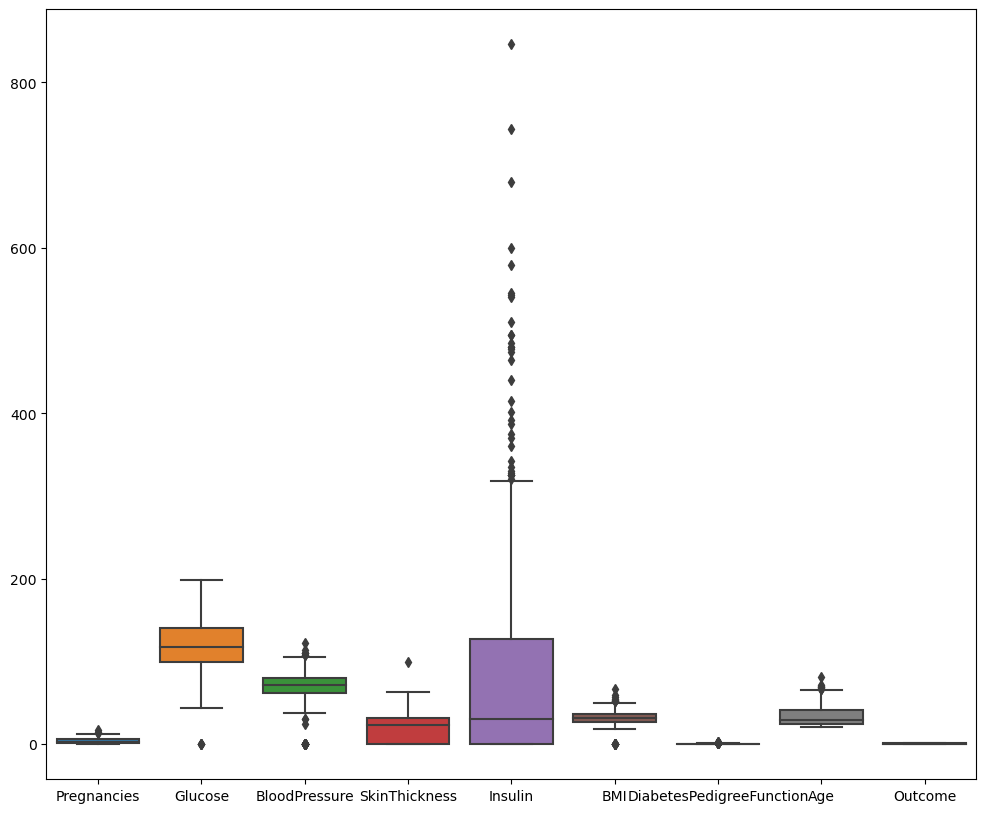

In [8]:
plt.figure(figsize=(12,10))
sns.boxplot(df)
plt.show()

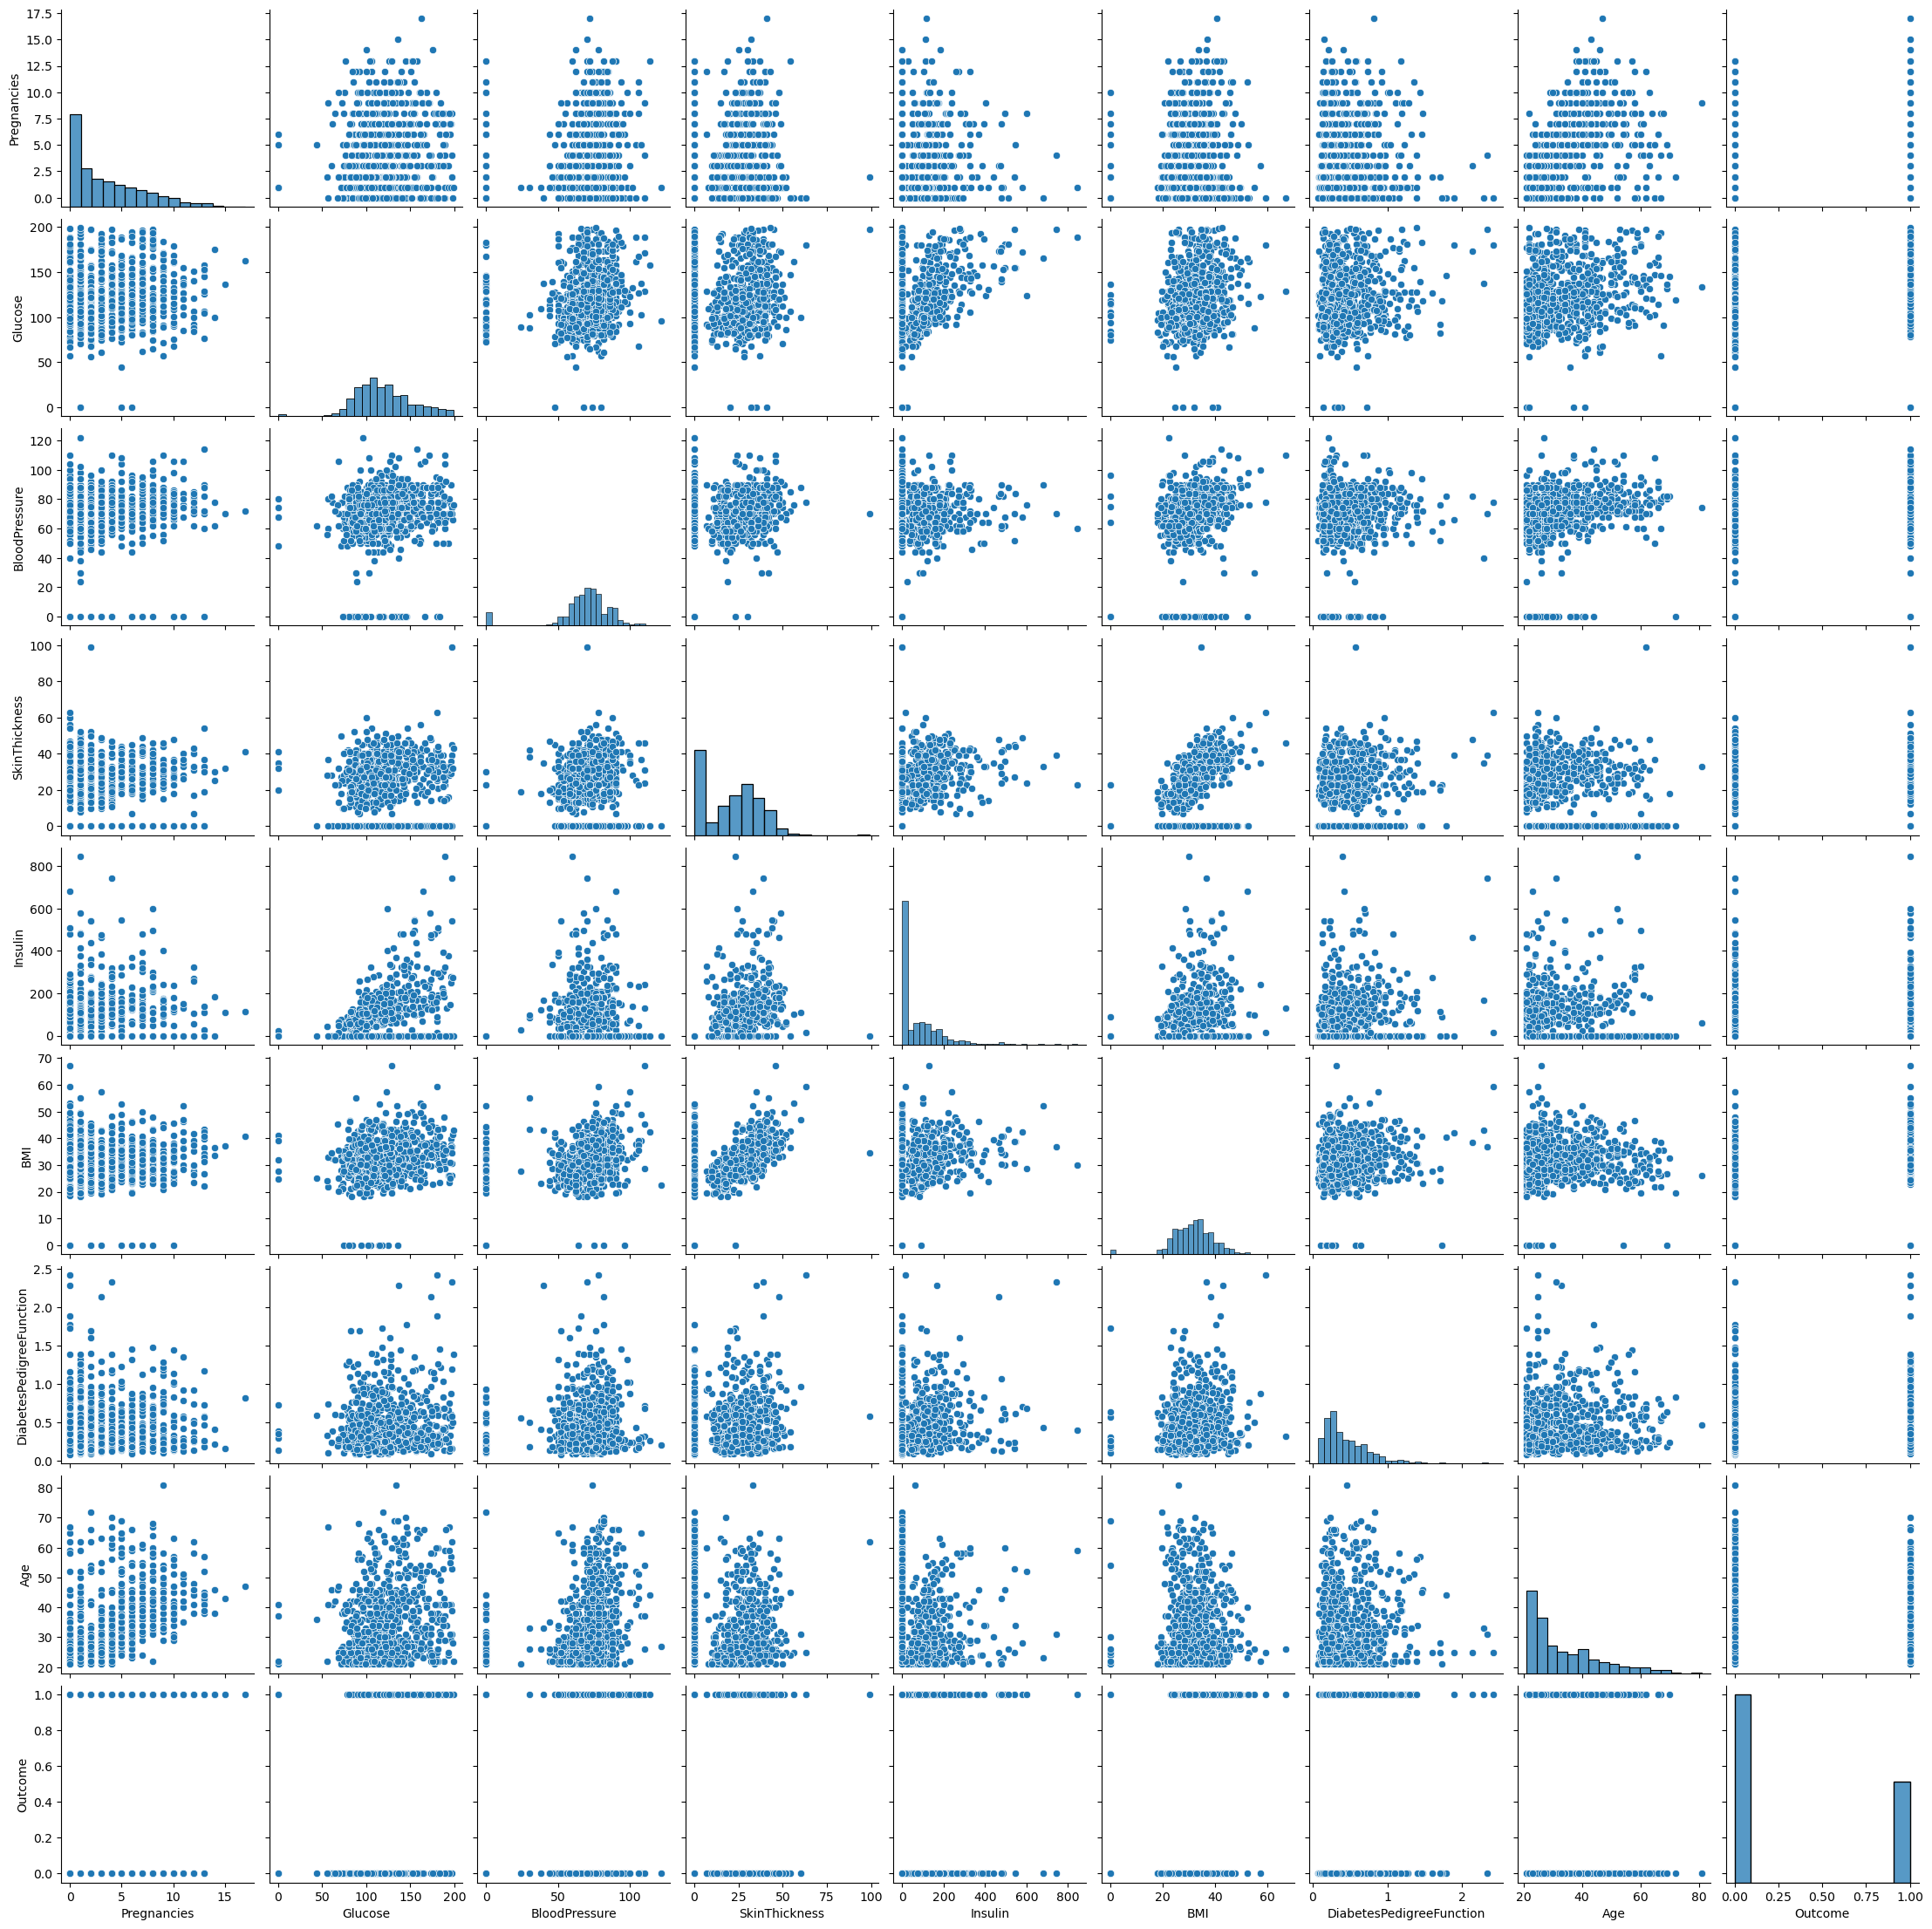

In [9]:
sns.pairplot(df)

<Axes: >

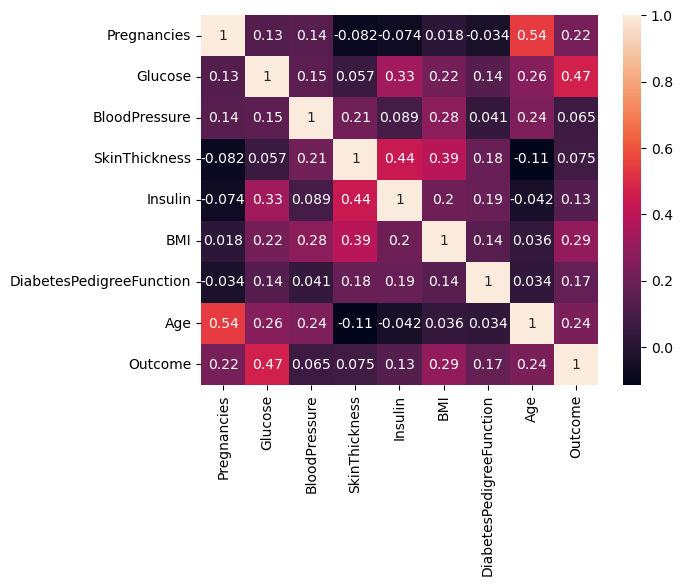

In [10]:
sns.heatmap(df.corr(),annot=True)

### Q2. Preprocess the data by cleaning missing values, removing outliers, and transforming categorical variables into dummy variables if necessary.

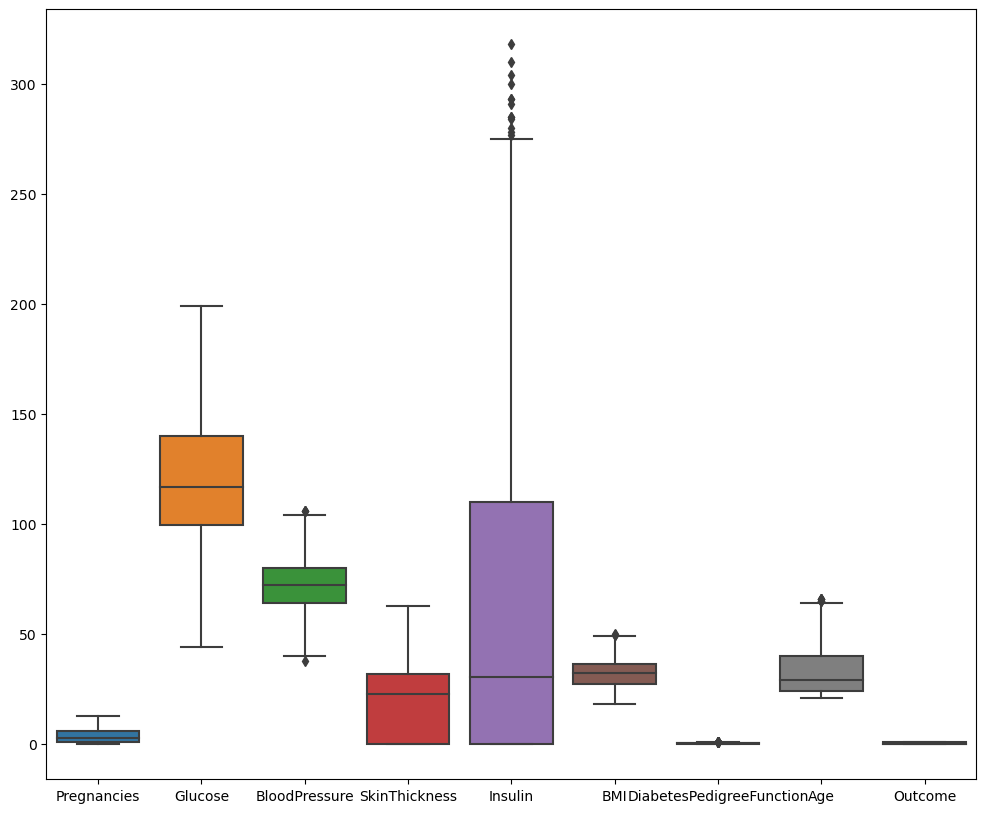

In [14]:
plt.figure(figsize=(12,10))
sns.boxplot(df)
plt.show()

In [13]:
def remove_outlier(col):
    # print(col)
    
    Q1,Q2,Q3 = df[col].quantile([0.25,0.50,0.75])
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    cleaned_data = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    df[col] = df[col].apply(lambda x: cleaned_data[col].mean() if x < lower_bound or x > upper_bound else x)

for col in df.columns:
    remove_outlier(col)

### Q3. Split the dataset into a training set and a test set. Use a random seed to ensure reproducibility.

In [18]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

### Q4. Use a decision tree algorithm, such as ID3 or C4.5, to train a decision tree model on the training set. Use cross-validation to optimize the hyperparameters and avoid overfitting.

In [23]:
classifier = DecisionTreeClassifier()

param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [25]:
classifier_cv = GridSearchCV(classifier,param_grid=param_grid,cv=5)

In [26]:
classifier_cv.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 5, 10, 15, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]})

In [28]:
classifier_cv.best_params_

{'criterion': 'entropy',
 'max_depth': 5,
 'min_samples_leaf': 2,
 'min_samples_split': 2}

In [37]:
classifier_cv.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=2)

In [56]:
tree_cls = DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=2, min_samples_split= 2)
tree_cls.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=2)

In [39]:
y_pred = tree.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0], dtype=int64)

### Q5. Evaluate the performance of the decision tree model on the test set using metrics such as accuracy, precision, recall, and F1 score. Use confusion matrices and ROC curves to visualize the results.

In [43]:
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.75      0.84      0.79       123
           1       0.63      0.49      0.55        69

    accuracy                           0.71       192
   macro avg       0.69      0.67      0.67       192
weighted avg       0.70      0.71      0.70       192

[[103  20]
 [ 35  34]]
0.7135416666666666


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


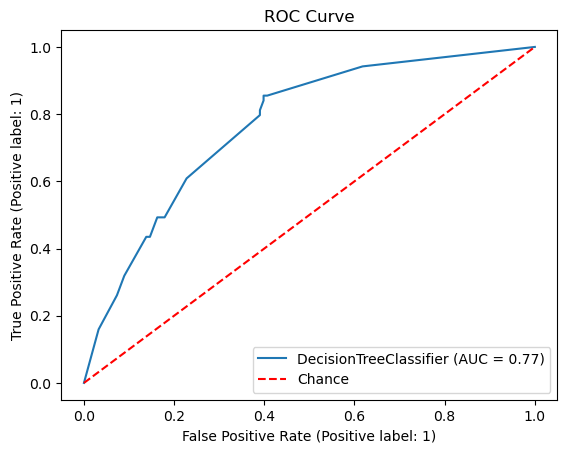

In [57]:
plot_roc_curve(tree_cls,X_test,y_test)
plt.title('ROC Curve')
plt.plot([0, 1], [0, 1], linestyle='--', color='r', label='Chance')
plt.legend()
plt.show()

### Q6. Interpret the decision tree by examining the splits, branches, and leaves. Identify the most important variables and their thresholds. Use domain knowledge and common sense to explain the patterns and trends.

[Text(0.543918918918919, 0.9166666666666666, 'X[1] <= 143.5\nentropy = 0.93\nsamples = 576\nvalue = [377, 199]'),
 Text(0.25675675675675674, 0.75, 'X[5] <= 26.35\nentropy = 0.788\nsamples = 454\nvalue = [347, 107]'),
 Text(0.10810810810810811, 0.5833333333333334, 'X[1] <= 132.5\nentropy = 0.177\nsamples = 113\nvalue = [110, 3]'),
 Text(0.05405405405405406, 0.4166666666666667, 'X[6] <= 0.675\nentropy = 0.078\nsamples = 104\nvalue = [103, 1]'),
 Text(0.02702702702702703, 0.25, 'entropy = 0.0\nsamples = 92\nvalue = [92, 0]'),
 Text(0.08108108108108109, 0.25, 'X[6] <= 0.734\nentropy = 0.414\nsamples = 12\nvalue = [11, 1]'),
 Text(0.05405405405405406, 0.08333333333333333, 'entropy = 1.0\nsamples = 2\nvalue = [1, 1]'),
 Text(0.10810810810810811, 0.08333333333333333, 'entropy = 0.0\nsamples = 10\nvalue = [10, 0]'),
 Text(0.16216216216216217, 0.4166666666666667, 'X[3] <= 7.0\nentropy = 0.764\nsamples = 9\nvalue = [7, 2]'),
 Text(0.13513513513513514, 0.25, 'entropy = 0.918\nsamples = 3\nvalue =

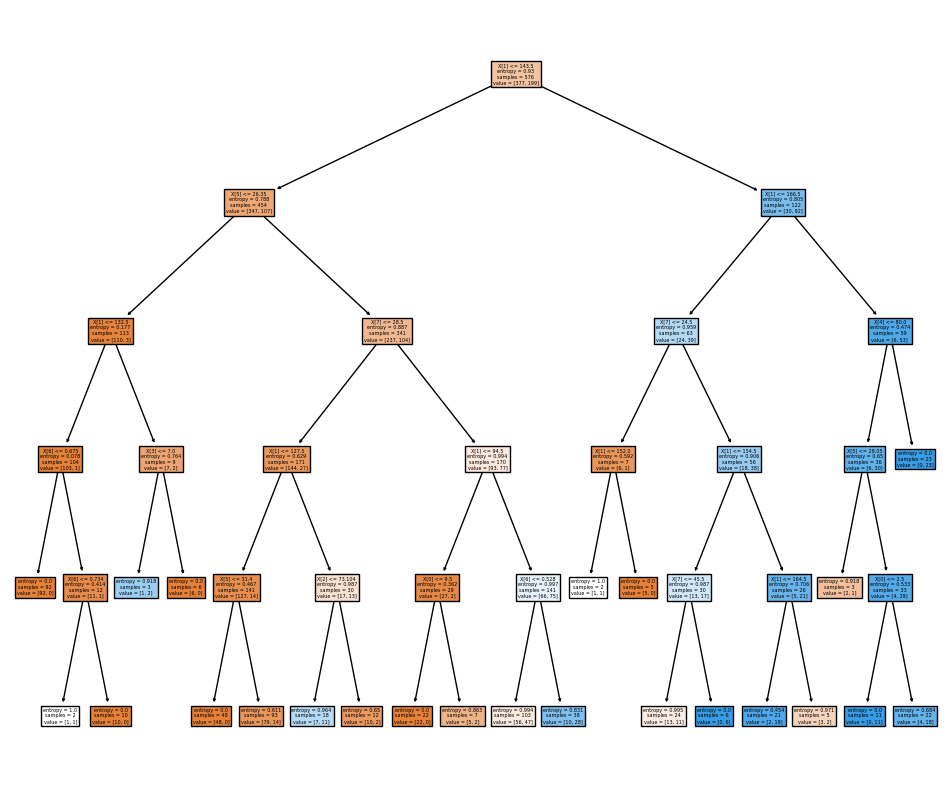

In [60]:
from sklearn import tree
plt.figure(figsize=(12,10))
tree.plot_tree(tree_cls,filled=True)
# plt.show()

### Q7. Validate the decision tree model by applying it to new data or testing its robustness to changes in the dataset or the environment. Use sensitivity analysis and scenario testing to explore the uncertainty and risks.

In [ ]:
# Assuming 'X' contains feature data and 'y' contains diabetes labels

# 1. Sensitivity Analysis
# Vary key variables
# Example: Modify glucose levels by adding noise
import numpy as np
X_perturbed = X.copy()
X_perturbed[:, 2] += np.random.normal(0, 1, size=X_perturbed.shape[0])  # Perturb glucose levels

# 2. Threshold Adjustment (if applicable)
# For instance, modify the threshold for diabetes prediction
# Example: Vary the threshold for diabetes classification
threshold = 0.5  # Current threshold
y_pred = (model.predict_proba(X)[:, 1] > threshold).astype(int)  # Adjust threshold

# 3. Scenario Testing
# Evaluate model performance on a different dataset
# Example: Use a subset of data from a different time period
X_different_time = ...  # Load data from a different time period
y_different_time = ...
model_performance_different_time = model.evaluate(X_different_time, y_different_time)

# Introduce outliers or extreme values
# Example: Add outliers to glucose levels
X_outliers = X.copy()
X_outliers[0, 2] = 400  # Introduce an extreme value for glucose

# Simulate missing data or extreme values
# Example: Replace some values with NaN to simulate missing data
X_missing_values = X.copy()
X_missing_values[10:20, 3] = np.nan  # Introduce missing values in a feature range

# Consider environmental changes and evaluate model adaptability
# Example: Simulate lifestyle changes in a subgroup of data
X_lifestyle_change = X.copy()
X_lifestyle_change[50:100, 0] = 2.0  # Modify lifestyle factor for a subgroup
